This script does cluster assignment in Acropora using DFA from the package Adegenet\
It also calculates ADMIXTURE ancestry, and makes figures\
Author Jaelyn Bos

In [8]:
#Make sure R can find packages installed with Cond
.libPaths('/hb/home/jbos/.conda/envs/vcfR')
.libPaths("/hb/home/jbos/.conda/envs/vcfR/lib/R/library")

In [9]:
#Load packages
library(tidyverse)
library(vcfR)
library(adegenet)
library(poppr)
library(cowplot)
library(grid)
library(hierfstat)


Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



Attaching package: ‘hierfstat’


The following objects are masked from ‘package:adegenet’:

    Hs, read.fstat




In [10]:
#Load in SNP data in VCF format
all_snps <- read.vcfR("/hb/scratch/jbos/combined_snps/vcf_thinned500bp.recode.vcf")

Scanning file to determine attributes.
File attributes:
  meta lines: 1602
  header_line: 1603
  variant count: 2425
  column count: 379
Meta line 1602 read in.
All meta lines processed.
gt matrix initialized.
Character matrix gt created.
  Character matrix gt rows: 2425
  Character matrix gt cols: 379
  skip: 0
  nrows: 2425
  row_num: 0
Processed variant: 2425
All variants processed


In [11]:
#Check SNP data for number of individuals and SNPs
all_snps

***** Object of Class vcfR *****
370 samples
453 CHROMs
2,425 variants
Object size: 49.8 Mb
0 percent missing data
*****        *****         *****

In [12]:
#Convert to genind format
genind_snps <- vcfR2genind(all_snps)

In [14]:
#Read in eigenvectors and eigenvalues created with Plink2
eigenval <- read.table("/hb/scratch/jbos/combined_snps/pca_500bp.eigenval", header = FALSE, sep = " ")
eigenvec <- read.table("/hb/scratch/jbos/combined_snps/pca_500bp.eigenvec", header = FALSE, sep = "\t")

In [15]:
#Rename columns
colnames(eigenvec) <-c ('Sample_ID', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10')

In [16]:
#Calculate % of variation accounted for by each principal component
varPC1 <- (eigenval[1,1] / sum(eigenval$V1))*100
varPC2 <- (eigenval[2,1] / sum(eigenval$V1))*100
varPC3 <- (eigenval[3,1] / sum(eigenval$V1))*100
varPC4 <- (eigenval[4,1] / sum(eigenval$V1))*100

In [17]:
varPC1
varPC2
varPC3
varPC4

[1] 29.34932

[1] 20.76038

[1] 16.16899

[1] 6.488711

In [18]:
#Create 'island' value for Cebu vs. Leyte province (note that Camotes are in Cebu province)
#Create 'Pop' variable for sampling site
eigenvec$Island <- substr(eigenvec$Sample_ID,start=1,stop=3)
eigenvec$Pop <- substr(eigenvec$Sample_ID,start=1,stop=5)

In [21]:
#Read in metadata with distance to shore for each sample
metadat<-read.csv('metadata_shoredist.csv')

In [24]:
#Join variables
metadat_merge<-inner_join(eigenvec,metadat)

Joining with `by = join_by(Sample_ID)`


In [36]:
#Check relationships between PCs and latitude
summary(lm(PC1 ~ lat, data=metadat_merge))
summary(lm(PC2 ~ lat, data=metadat_merge))
summary(lm(PC3 ~ lat, data=metadat_merge))
summary(lm(PC4 ~ lat, data=metadat_merge))


Call:
lm(formula = PC1 ~ lat, data = metadat_merge)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.08931 -0.06036  0.02153  0.03530  0.07541 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.134980   0.057581   2.344   0.0197 *
lat         -0.012622   0.005554  -2.273   0.0237 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05076 on 328 degrees of freedom
  (23 observations deleted due to missingness)
Multiple R-squared:  0.0155,	Adjusted R-squared:  0.0125 
F-statistic: 5.165 on 1 and 328 DF,  p-value: 0.0237



Call:
lm(formula = PC2 ~ lat, data = metadat_merge)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.105481 -0.019442 -0.006883  0.034498  0.092287 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.088393   0.060034   1.472    0.142
lat         -0.008446   0.005791  -1.458    0.146

Residual standard error: 0.05292 on 328 degrees of freedom
  (23 observations deleted due to missingness)
Multiple R-squared:  0.006444,	Adjusted R-squared:  0.003414 
F-statistic: 2.127 on 1 and 328 DF,  p-value: 0.1457



Call:
lm(formula = PC3 ~ lat, data = metadat_merge)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.08284 -0.03566 -0.01095  0.01439  0.13706 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.263189   0.059778   4.403 1.45e-05 ***
lat         -0.025207   0.005766  -4.372 1.66e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05269 on 328 degrees of freedom
  (23 observations deleted due to missingness)
Multiple R-squared:  0.05506,	Adjusted R-squared:  0.05217 
F-statistic: 19.11 on 1 and 328 DF,  p-value: 1.658e-05



Call:
lm(formula = PC4 ~ lat, data = metadat_merge)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.206838 -0.018379 -0.001723  0.019781  0.168029 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -0.190819   0.058122  -3.283  0.00114 **
lat          0.018500   0.005606   3.300  0.00107 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05123 on 328 degrees of freedom
  (23 observations deleted due to missingness)
Multiple R-squared:  0.03213,	Adjusted R-squared:  0.02918 
F-statistic: 10.89 on 1 and 328 DF,  p-value: 0.001074


In [37]:
#Check relationships between PCs and longitude
summary(lm(PC1 ~ lon, data=metadat_merge))
summary(lm(PC2 ~ lon, data=metadat_merge))
summary(lm(PC3 ~ lon, data=metadat_merge))
summary(lm(PC4 ~ lon, data=metadat_merge))


Call:
lm(formula = PC1 ~ lon, data = metadat_merge)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.08523 -0.06378  0.02280  0.03598  0.07571 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  1.105179   0.686183   1.611    0.108
lon         -0.008868   0.005528  -1.604    0.110

Residual standard error: 0.05095 on 328 degrees of freedom
  (23 observations deleted due to missingness)
Multiple R-squared:  0.007787,	Adjusted R-squared:  0.004762 
F-statistic: 2.574 on 1 and 328 DF,  p-value: 0.1096



Call:
lm(formula = PC2 ~ lon, data = metadat_merge)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.107736 -0.020669 -0.006525  0.036810  0.090975 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -1.410577   0.710682  -1.985   0.0480 *
lon          0.011371   0.005725   1.986   0.0478 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05277 on 328 degrees of freedom
  (23 observations deleted due to missingness)
Multiple R-squared:  0.01188,	Adjusted R-squared:  0.008871 
F-statistic: 3.945 on 1 and 328 DF,  p-value: 0.04785



Call:
lm(formula = PC3 ~ lon, data = metadat_merge)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.075152 -0.035618 -0.011852  0.004254  0.137155 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  1.33223    0.72627   1.834   0.0675 .
lon         -0.01071    0.00585  -1.831   0.0680 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05393 on 328 degrees of freedom
  (23 observations deleted due to missingness)
Multiple R-squared:  0.01012,	Adjusted R-squared:  0.007104 
F-statistic: 3.354 on 1 and 328 DF,  p-value: 0.06795



Call:
lm(formula = PC4 ~ lon, data = metadat_merge)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.195332 -0.018400 -0.001203  0.015764  0.170255 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -1.823665   0.694019  -2.628  0.00900 **
lon          0.014697   0.005591   2.629  0.00897 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05154 on 328 degrees of freedom
  (23 observations deleted due to missingness)
Multiple R-squared:  0.02063,	Adjusted R-squared:  0.01765 
F-statistic: 6.911 on 1 and 328 DF,  p-value: 0.008972


In [34]:
#Check relationships between PCs and depth
summary(lm(PC1 ~ Depth_ft, data=metadat_merge))
summary(lm(PC2 ~ Depth_ft, data=metadat_merge))
summary(lm(PC3 ~ Depth_ft, data=metadat_merge))
summary(lm(PC4 ~ Depth_ft, data=metadat_merge))


Call:
lm(formula = PC1 ~ Depth_ft, data = metadat_merge)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.09992 -0.05626  0.01843  0.03816  0.08174 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.0312840  0.0108322   2.888  0.00455 **
Depth_ft    -0.0016994  0.0007859  -2.162  0.03244 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05003 on 129 degrees of freedom
  (222 observations deleted due to missingness)
Multiple R-squared:  0.03498,	Adjusted R-squared:  0.0275 
F-statistic: 4.676 on 1 and 129 DF,  p-value: 0.03244



Call:
lm(formula = PC2 ~ Depth_ft, data = metadat_merge)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.098662 -0.017860 -0.007583  0.042574  0.084214 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.0055336  0.0126206  -0.438    0.662
Depth_ft     0.0002069  0.0009157   0.226    0.822

Residual standard error: 0.0583 on 129 degrees of freedom
  (222 observations deleted due to missingness)
Multiple R-squared:  0.0003955,	Adjusted R-squared:  -0.007353 
F-statistic: 0.05104 on 1 and 129 DF,  p-value: 0.8216



Call:
lm(formula = PC3 ~ Depth_ft, data = metadat_merge)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.062853 -0.037091 -0.012484  0.004871  0.152023 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.0112851  0.0114751  -0.983    0.327
Depth_ft     0.0005728  0.0008326   0.688    0.493

Residual standard error: 0.053 on 129 degrees of freedom
  (222 observations deleted due to missingness)
Multiple R-squared:  0.003656,	Adjusted R-squared:  -0.004068 
F-statistic: 0.4733 on 1 and 129 DF,  p-value: 0.4927



Call:
lm(formula = PC4 ~ Depth_ft, data = metadat_merge)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.214017 -0.021539 -0.007997  0.012571  0.150274 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) 8.574e-03  9.585e-03   0.895    0.373
Depth_ft    6.009e-05  6.955e-04   0.086    0.931

Residual standard error: 0.04428 on 129 degrees of freedom
  (222 observations deleted due to missingness)
Multiple R-squared:  5.786e-05,	Adjusted R-squared:  -0.007694 
F-statistic: 0.007465 on 1 and 129 DF,  p-value: 0.9313


In [38]:
#Check relationships between PCs and distance to shore
summary(lm(PC1 ~ SHOREDIST, data=metadat_merge))
summary(lm(PC2 ~ SHOREDIST, data=metadat_merge))
summary(lm(PC3 ~ SHOREDIST, data=metadat_merge))
summary(lm(PC4 ~ SHOREDIST, data=metadat_merge))


Call:
lm(formula = PC1 ~ SHOREDIST, data = metadat_merge)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.08317 -0.06288  0.02453  0.03507  0.08468 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  4.332e-03  2.838e-03   1.526    0.128
SHOREDIST   -3.081e-07  2.195e-07  -1.404    0.161

Residual standard error: 0.05123 on 351 degrees of freedom
Multiple R-squared:  0.005582,	Adjusted R-squared:  0.002749 
F-statistic:  1.97 on 1 and 351 DF,  p-value: 0.1613



Call:
lm(formula = PC2 ~ SHOREDIST, data = metadat_merge)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.10213 -0.01920 -0.01003  0.03460  0.08388 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) 1.029e-03  2.930e-03   0.351    0.726
SHOREDIST   4.147e-08  2.266e-07   0.183    0.855

Residual standard error: 0.05288 on 351 degrees of freedom
Multiple R-squared:  9.542e-05,	Adjusted R-squared:  -0.002753 
F-statistic: 0.03349 on 1 and 351 DF,  p-value: 0.8549



Call:
lm(formula = PC3 ~ SHOREDIST, data = metadat_merge)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.073697 -0.031845 -0.010193  0.004659  0.142612 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  2.267e-03  2.946e-03   0.770    0.442
SHOREDIST   -2.918e-07  2.278e-07  -1.281    0.201

Residual standard error: 0.05318 on 351 degrees of freedom
Multiple R-squared:  0.004653,	Adjusted R-squared:  0.001817 
F-statistic: 1.641 on 1 and 351 DF,  p-value: 0.2011



Call:
lm(formula = PC4 ~ SHOREDIST, data = metadat_merge)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.204794 -0.016924 -0.002067  0.016911  0.175622 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) 6.423e-04  2.887e-03   0.223    0.824
SHOREDIST   2.782e-07  2.232e-07   1.246    0.214

Residual standard error: 0.05211 on 351 degrees of freedom
Multiple R-squared:  0.004404,	Adjusted R-squared:  0.001567 
F-statistic: 1.553 on 1 and 351 DF,  p-value: 0.2136


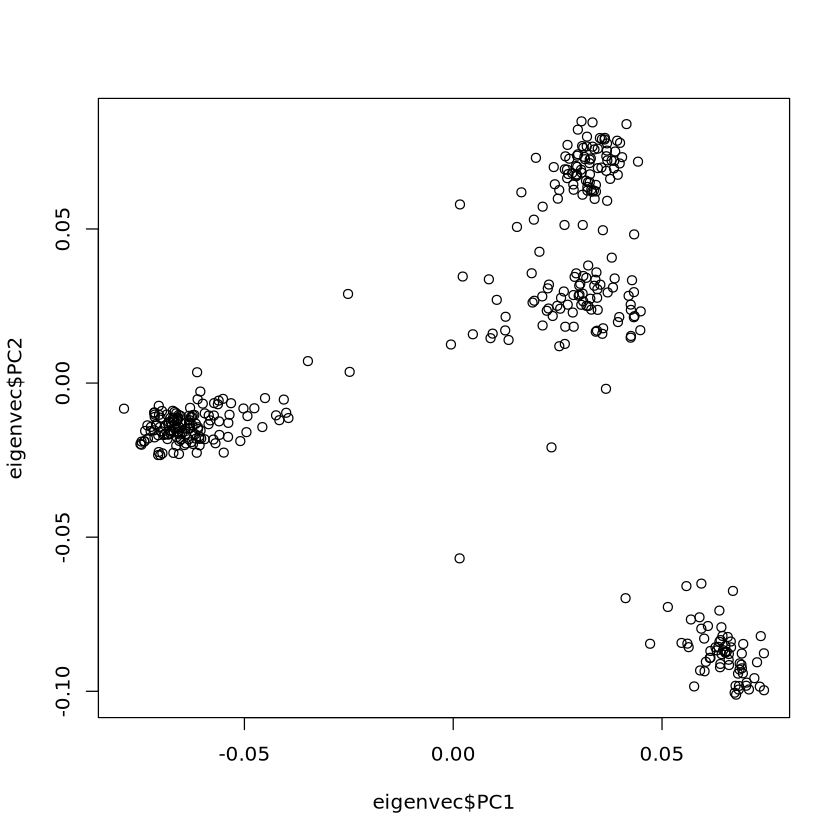

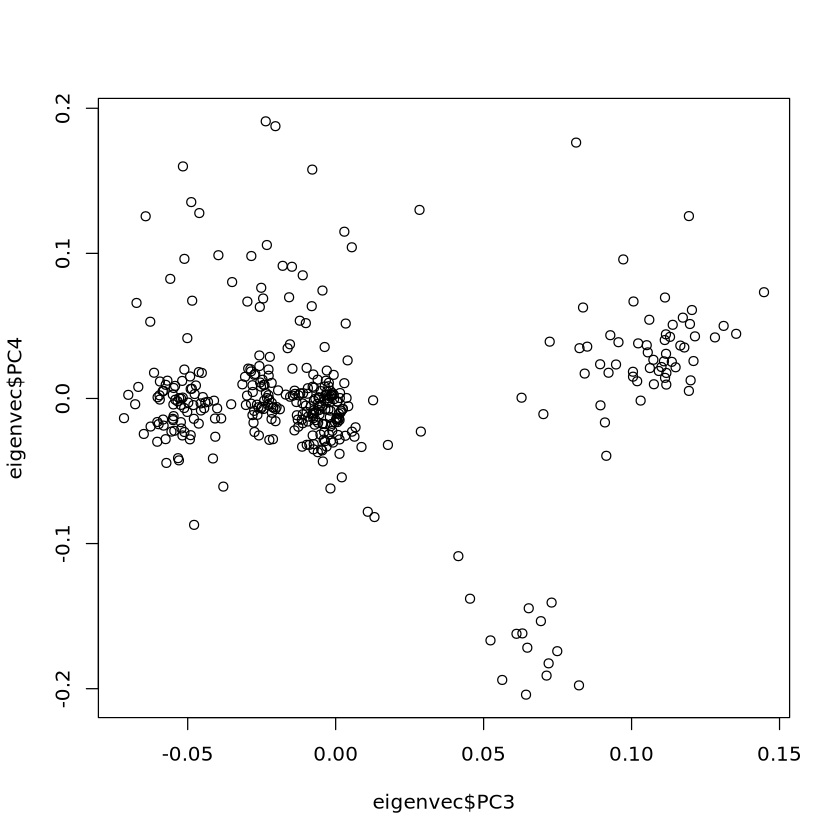

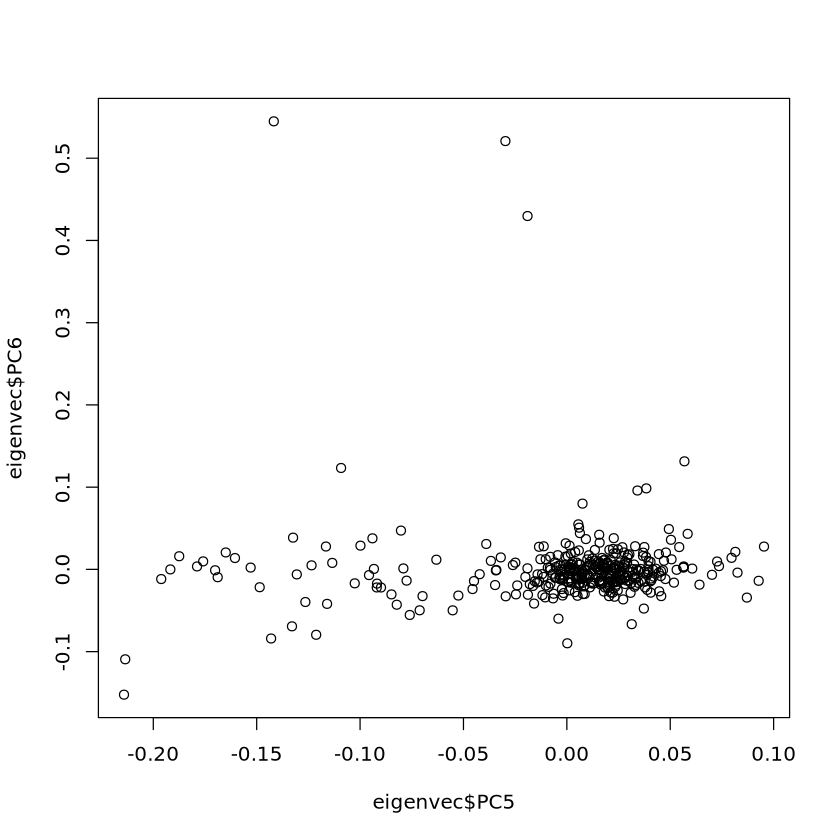

In [42]:
#Visualize data in PC space
plot(eigenvec$PC1,eigenvec$PC2)
plot(eigenvec$PC3,eigenvec$PC4)
plot(eigenvec$PC5,eigenvec$PC6)

Choose the number of clusters (>=2): 

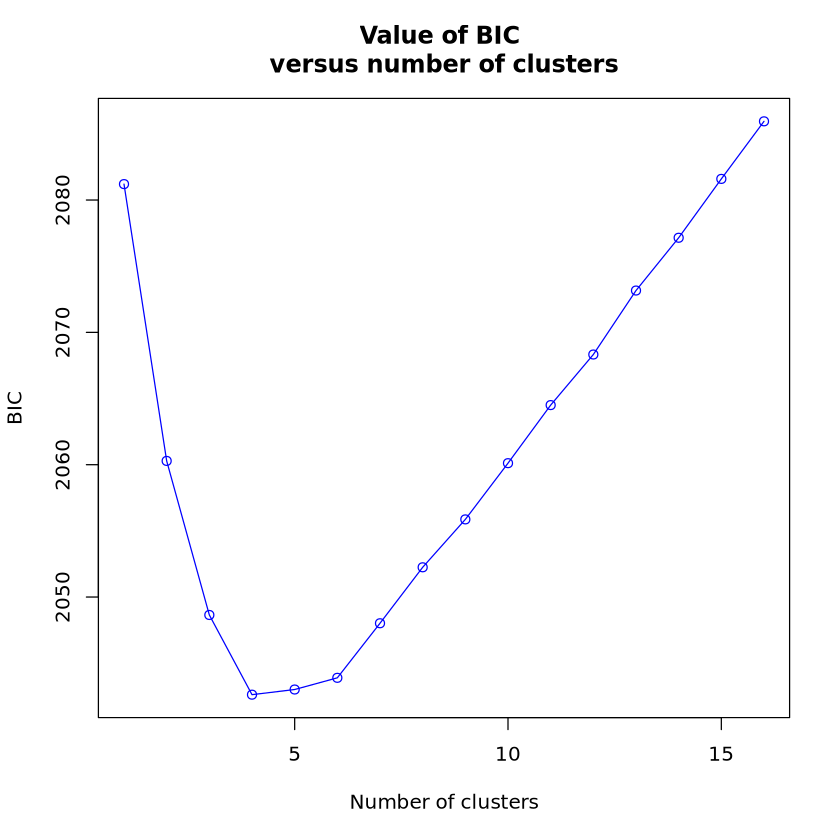

In [43]:
#Use DFA to find number of distinct clusters
grps<-find.clusters(genind_snps,max.n.clust=16,n.pca=500)

In [44]:
#Check cross validation stats
grps$Kstat

K=1      K=2      K=3      K=4      K=5      K=6      K=7      K=8 
2081.203 2060.287 2048.646 2042.625 2043.014 2043.898 2048.021 2052.249 
     K=9     K=10     K=11     K=12     K=13     K=14     K=15     K=16 
2055.868 2060.117 2064.504 2068.327 2073.161 2077.148 2081.596 2085.945

In [46]:
#Find clusters
grp<-find.clusters(genind_snps,n.clust=4,n.pca=250)
table(grp$grp)


  1   2   3   4 
141  89  81  59 

In [58]:
taxa1<-names(grp$grp[grp$grp==1])
write.csv(taxa1,file='taxa1_b.csv')
taxa2<-names(grp$grp[grp$grp==2])
write.csv(taxa2,file='taxa2_b.csv')
taxa3<-names(grp$grp[grp$grp==3])
write.csv(taxa3,file='taxa3_b.csv')
taxa4<-names(grp$grp[grp$grp==4])
write.csv(taxa4,file='taxa4_b.csv')

In [14]:
inds1 = read.csv('taxa1_inds.csv')[,2]
inds2 = read.csv('taxa2_inds.csv')[,2]
inds3 = read.csv('taxa3_inds.csv')[,2]
inds4 = read.csv('taxa4_inds.csv')[,2]

In [96]:
#Import results from ADMIXTURE for comparison with DFA and plotting
ind_tab<-read.table('/hb/scratch/jbos/combined_snps/all_taxa_500bp_int_thinned.fam')
ind_names<-paste(ind_tab[,1],'_',ind_tab[,2],sep="")
admix_tab<-read.table('/hb/scratch/jbos/combined_snps/all_taxa_500bp_int_thinned.4.Q')
colnames(admix_tab)<-c('grp1','grp2','grp3','grp4')
admix_tab<-cbind(ind_names,admix_tab)

In [97]:
#Little function to calculate which ancestry group comprises the maximum ancestry fraction of each individual
max_frac<-function(admix_row){
    x<-names(admix_row[2:5])[admix_row[2:5]==max(admix_row[2:5])]
    return(x)
    }

In [106]:
#Make separate ADMIXTURE dataframes based on max ancestry group
admix_tab$main_frac<-apply(admix_tab,MARGIN=1,FUN=max_frac)
admix_grp1<-admix_tab[admix_tab$main_frac=='grp1',]
admix_grp2<-admix_tab[admix_tab$main_frac=='grp2',]
admix_grp3<-admix_tab[admix_tab$main_frac=='grp3',]
admix_grp4<-admix_tab[admix_tab$main_frac=='grp4',]

In [107]:
#Figuring out which ADMXITURE groups correspond to which DFA groups
table(admix_grp1$ind_names %in% inds1)
table(admix_grp1$ind_names %in% inds2)
table(admix_grp1$ind_names %in% inds3)
table(admix_grp1$ind_names %in% inds4)


FALSE 
   71 


FALSE 
   71 


FALSE 
   71 


FALSE  TRUE 
    5    66 

In [108]:
#Figuring out which ADMXITURE groups correspond to which DFA groups
table(admix_grp2$ind_names %in% inds1)
table(admix_grp2$ind_names %in% inds2)
table(admix_grp2$ind_names %in% inds3)
table(admix_grp2$ind_names %in% inds4)


FALSE 
   67 


FALSE 
   67 


FALSE  TRUE 
    9    58 


FALSE  TRUE 
   66     1 

In [109]:
#Figuring out which ADMXITURE groups correspond to which DFA groups
table(admix_grp3$ind_names %in% inds1)
table(admix_grp3$ind_names %in% inds2)
table(admix_grp3$ind_names %in% inds3)
table(admix_grp3$ind_names %in% inds4)


FALSE  TRUE 
   17   124 


FALSE 
  141 


FALSE 
  141 


FALSE 
  141 

In [110]:
#Figuring out which ADMXITURE groups correspond to which DFA groups
table(admix_grp4$ind_names %in% inds1)
table(admix_grp4$ind_names %in% inds2)
table(admix_grp4$ind_names %in% inds3)
table(admix_grp4$ind_names %in% inds4)


FALSE 
   91 


FALSE  TRUE 
   18    73 


FALSE 
   91 


FALSE  TRUE 
   90     1 

In [112]:
#Reassign ADMIXTURE column names based on DFA groups
colnames(admix_tab)<-c('ind_names','Taxa4','Taxa3','Taxa1','Taxa2','main_frac')
admix_tab$main_frac<-apply(admix_tab,MARGIN=1,FUN=max_frac)

In [113]:
#Add variable to ADMIXTURE dataframe specifying DFA group to which each individual was assigned
admix_tab$dfa_assignment<-0
admix_tab$dfa_assignment[admix_tab$ind_names %in% inds1]<-1
admix_tab$dfa_assignment[admix_tab$ind_names %in% inds2]<-2
admix_tab$dfa_assignment[admix_tab$ind_names %in% inds3]<-3
admix_tab$dfa_assignment[admix_tab$ind_names %in% inds4]<-4

In [114]:
#Check number of individuals with >50% ancestry from single group
table(apply(admix_tab[,2:5],MARGIN=1,FUN=max)>=0.5)
366/370

#Check number of individuals with >75% ancestry from single group
table(apply(admix_tab[,2:5],MARGIN=1,FUN=max)>=0.75)
356/370

#Check number of individuals with >87.5% ancestry from single group
table(apply(admix_tab[,2:5],MARGIN=1,FUN=max)>=0.875)
320/370


FALSE  TRUE 
    4   366 

[1] 0.9891892


FALSE  TRUE 
   14   356 

[1] 0.9621622


FALSE  TRUE 
   50   320 

[1] 0.8648649

In [160]:
#Sort ADMIXTURE dataframe by main ancestry group 
admix_tab<-admix_tab[order(admix_tab$main_frac),]

In [161]:
#Assign taxa to colors, for plotting
taxa_colors <- c("Taxa1" = "#440154FF","Taxa2" = "#31688EFF","Taxa3" = "#35B779FF","Taxa4" = "#FDE725FF",'Unassigned' = "#FFFFFF")

In [167]:
#Create long form dataframe for plotting
admix_long<-pivot_longer(admix_tab,cols=c('Taxa1','Taxa2','Taxa3','Taxa4'),names_to='Taxon')
admix_long$ind_names<-factor(admix_long$ind_names, levels = unique(admix_long$ind_names)) 

In [168]:
cors <- as.data.frame(eigenvec$Sample_ID)
cors$TaxaColors<-'#FFFFFF'
cors$Taxon<-'Unassigned'

colnames(cors)<-c('Sample_ID','TaxaColors','Taxon')

cors[cors$Sample_ID %in% inds1,2]<-'#440154FF'
cors[cors$Sample_ID %in% inds2,2]<-'#31688EFF'
cors[cors$Sample_ID %in% inds3,2]<-'#35B779FF'
cors[cors$Sample_ID %in% inds4,2]<-'#FDE725FF'

cors[cors$Sample_ID %in% inds1,3]<-'Taxa1'
cors[cors$Sample_ID %in% inds2,3]<-'Taxa2'
cors[cors$Sample_ID %in% inds3,3]<-'Taxa3'
cors[cors$Sample_ID %in% inds4,3]<-'Taxa4'

plot_points<-left_join(eigenvec,cors)

Joining with `by = join_by(Sample_ID)`


In [169]:
plot_points<-left_join(eigenvec,cors)
plot_points<-plot_points[!plot_points$Taxon=='Unassigned',]

Joining with `by = join_by(Sample_ID)`


In [170]:
p1 <- ggplot(plot_points, aes(x=PC1, y=PC2, color=Taxon)) +
  geom_point(shape=19, size=5, alpha=0.5) +
  theme_classic() +
  scale_color_manual(values = taxa_colors) +
  theme(
    plot.title = element_text(size = 24),
    axis.text.x = element_text(size = 16),
    axis.text.y = element_text(size = 16),
    legend.text = element_text(size = 16),
    legend.title = element_text(size = 18),
    axis.title.x = element_text(size = 20),
    axis.title.y = element_text(size = 20))+
  labs(color = "Taxon", x = "PC1:29%", y = "PC2:21%")

plot_colors <- c("#440154FF", "#31688EFF", "#35B779FF", "#FDE725FF")

adplot <- ggplot(admix_long, aes(x = ind_names, y = value, fill = Taxon)) +
  geom_col(position = position_fill()) +
  scale_fill_manual(values = plot_colors) +
  ylab("Ancestry Fraction") +
  theme(legend.position = "none")+
  theme(
    plot.title = element_text(size = 18),
    axis.title.y = element_text(size = 20),
    axis.text.x = element_blank(),
    axis.text.y = element_text(size = 18),
    axis.title.x = element_blank(),
    axis.ticks.x = element_blank()
  )

p1_adj <- p1 + theme(plot.margin = margin(5.5, 5.5, 5.5, 20, unit = "pt"))
adplot_adj <- adplot + theme(plot.margin = margin(5.5, 5.5, 5.5, 20, unit = "pt"))

combined <- plot_grid(
  p1_adj, adplot_adj,
  labels = c("A)", "B)"),
  label_size = 24,
  ncol = 1,
  align = "v"
)


# --- Save to file ---
ggsave("cryptic_acropora.png", combined, width = 8, height = 8, dpi = 1200, units = "in")

In [25]:
#Check statistical significance of FSTs between DFA groups

In [20]:
individuals<-as.data.frame(matrix(nrow=nrow(genind_snps@tab),ncol=1))
individuals$ind<-rownames(genind_snps@tab)
colnames(individuals)<-c('taxa','ind')

individuals$taxa<-0
individuals[individuals$ind %in% inds1,1]<-1
individuals[individuals$ind %in% inds2,1]<-2
individuals[individuals$ind %in% inds3,1]<-3
individuals[individuals$ind %in% inds4,1]<-4

In [23]:
genind_snps@pop<-as.factor(individuals$taxa)

In [24]:
hstat2<-genind2hierfstat(genind_snps,pop=genind_snps@pop)

In [3]:
#Calculate pairwise FSTs based on cryptic Acropora taxa
fst_acropora<-pairwise.WCfst(hstat2)

ERROR: Error in pairwise.WCfst(hstat2): could not find function "pairwise.WCfst"


In [ ]:
fst_acropora

In [27]:
boot12<-ecdf(read.csv('acropora12_fst_boot.csv')[,2])
boot13<-ecdf(read.csv('acropora13_fst_boot.csv')[,2])
boot14<-ecdf(read.csv('acropora14_fst_boot.csv')[,2])
boot23<-ecdf(read.csv('acropora23_fst_boot.csv')[,2])
boot24<-ecdf(read.csv('acropora24_fst_boot.csv')[,2])
boot34<-ecdf(read.csv('acropora34_fst_boot.csv')[,2])

In [28]:
boot12(fst_acropora[2,3])

ERROR: Error: object 'fst_acropora' not found


In [ ]:
boot13(fst_acropora[2,4])

In [ ]:
boot14(fst_acropora[2,5])

In [ ]:
boot23(fst_acropora[3,4])

In [ ]:
boot24(fst_acropora[3,5])

In [ ]:
boot34(fst_acropora[4,5])

In [172]:
#Finally, check PC correlations for individual taxa

In [173]:
eigenval1 <- read.table("/hb/scratch/jbos/spp1/pca_500bp.eigenval", header = FALSE, sep = " ")
eigenvec1 <- read.table("/hb/scratch/jbos/spp1/pca_500bp.eigenvec", header = FALSE, sep = "\t")
colnames(eigenvec1) <-c ('Sample_ID', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10')
eigenvec1$Island <- substr(eigenvec1$Sample_ID,start=1,stop=3)
eigenvec1$Pop <- substr(eigenvec1$Sample_ID,start=1,stop=5)

In [174]:
metadat_merge1<-inner_join(eigenvec1,metadat)

Joining with `by = join_by(Sample_ID)`


In [176]:
summary(lm(PC1 ~ lat, data=metadat_merge1))
summary(lm(PC2 ~ lat, data=metadat_merge1))
summary(lm(PC3 ~ lat, data=metadat_merge1))


Call:
lm(formula = PC1 ~ lat, data = metadat_merge1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.23790 -0.04369 -0.00961  0.02915  0.66349 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.022031   0.211180   0.104    0.917
lat         -0.002127   0.020178  -0.105    0.916

Residual standard error: 0.09235 on 98 degrees of freedom
  (10 observations deleted due to missingness)
Multiple R-squared:  0.0001134,	Adjusted R-squared:  -0.01009 
F-statistic: 0.01111 on 1 and 98 DF,  p-value: 0.9163



Call:
lm(formula = PC2 ~ lat, data = metadat_merge1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18465 -0.04939 -0.01321  0.01727  0.48781 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.12910    0.22181  -0.582    0.562
lat          0.01244    0.02119   0.587    0.558

Residual standard error: 0.097 on 98 degrees of freedom
  (10 observations deleted due to missingness)
Multiple R-squared:  0.003506,	Adjusted R-squared:  -0.006662 
F-statistic: 0.3448 on 1 and 98 DF,  p-value: 0.5584



Call:
lm(formula = PC3 ~ lat, data = metadat_merge1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35907 -0.03892 -0.00092  0.03028  0.32864 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.06512    0.22079   0.295    0.769
lat         -0.00627    0.02110  -0.297    0.767

Residual standard error: 0.09656 on 98 degrees of freedom
  (10 observations deleted due to missingness)
Multiple R-squared:  0.0009005,	Adjusted R-squared:  -0.009294 
F-statistic: 0.08832 on 1 and 98 DF,  p-value: 0.7669


In [177]:
summary(lm(PC1 ~ lon, data=metadat_merge1))
summary(lm(PC2 ~ lon, data=metadat_merge1))
summary(lm(PC3 ~ lon, data=metadat_merge1))


Call:
lm(formula = PC1 ~ lon, data = metadat_merge1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.23826 -0.04304 -0.00906  0.02887  0.66280 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.0735064  2.5150623  -0.029    0.977
lon          0.0005902  0.0202525   0.029    0.977

Residual standard error: 0.09236 on 98 degrees of freedom
  (10 observations deleted due to missingness)
Multiple R-squared:  8.666e-06,	Adjusted R-squared:  -0.0102 
F-statistic: 0.0008493 on 1 and 98 DF,  p-value: 0.9768



Call:
lm(formula = PC2 ~ lon, data = metadat_merge1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16707 -0.05528 -0.01285  0.02489  0.47811 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -5.27412    2.59198  -2.035   0.0446 *
lon          0.04248    0.02087   2.035   0.0445 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09518 on 98 degrees of freedom
  (10 observations deleted due to missingness)
Multiple R-squared:  0.04055,	Adjusted R-squared:  0.03076 
F-statistic: 4.142 on 1 and 98 DF,  p-value: 0.04453



Call:
lm(formula = PC3 ~ lon, data = metadat_merge1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36323 -0.03582 -0.00228  0.03057  0.33340 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.854561   2.629189  -0.325    0.746
lon          0.006878   0.021171   0.325    0.746

Residual standard error: 0.09655 on 98 degrees of freedom
  (10 observations deleted due to missingness)
Multiple R-squared:  0.001076,	Adjusted R-squared:  -0.009117 
F-statistic: 0.1055 on 1 and 98 DF,  p-value: 0.746


In [178]:
summary(lm(PC1 ~ Depth_ft, data=metadat_merge1))
summary(lm(PC2 ~ Depth_ft, data=metadat_merge1))
summary(lm(PC3 ~ Depth_ft, data=metadat_merge1))


Call:
lm(formula = PC1 ~ Depth_ft, data = metadat_merge1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.062438 -0.037103  0.004026  0.033688  0.072795 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.0001494  0.0177945  -0.008    0.993
Depth_ft     0.0002289  0.0011422   0.200    0.842

Residual standard error: 0.04143 on 31 degrees of freedom
  (77 observations deleted due to missingness)
Multiple R-squared:  0.001294,	Adjusted R-squared:  -0.03092 
F-statistic: 0.04018 on 1 and 31 DF,  p-value: 0.8424



Call:
lm(formula = PC2 ~ Depth_ft, data = metadat_merge1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.09923 -0.03693 -0.00718  0.01821  0.32268 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.0326913  0.0307848  -1.062    0.296
Depth_ft     0.0006166  0.0019760   0.312    0.757

Residual standard error: 0.07168 on 31 degrees of freedom
  (77 observations deleted due to missingness)
Multiple R-squared:  0.003132,	Adjusted R-squared:  -0.02903 
F-statistic: 0.09739 on 1 and 31 DF,  p-value: 0.7571



Call:
lm(formula = PC3 ~ Depth_ft, data = metadat_merge1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.117353 -0.028075 -0.007087  0.022274  0.300090 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -3.567e-03  2.977e-02  -0.120    0.905
Depth_ft     9.216e-05  1.911e-03   0.048    0.962

Residual standard error: 0.06933 on 31 degrees of freedom
  (77 observations deleted due to missingness)
Multiple R-squared:  7.501e-05,	Adjusted R-squared:  -0.03218 
F-statistic: 0.002326 on 1 and 31 DF,  p-value: 0.9618


In [179]:
summary(lm(PC1 ~ SHOREDIST, data=metadat_merge1))
summary(lm(PC2 ~ SHOREDIST, data=metadat_merge1))
summary(lm(PC3 ~ SHOREDIST, data=metadat_merge1))


Call:
lm(formula = PC1 ~ SHOREDIST, data = metadat_merge1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.23796 -0.04385 -0.00806  0.02943  0.66298 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -2.296e-04  9.048e-03  -0.025    0.980
SHOREDIST    1.155e-07  5.926e-07   0.195    0.846

Residual standard error: 0.08996 on 108 degrees of freedom
Multiple R-squared:  0.0003519,	Adjusted R-squared:  -0.008904 
F-statistic: 0.03801 on 1 and 108 DF,  p-value: 0.8458



Call:
lm(formula = PC2 ~ SHOREDIST, data = metadat_merge1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.19196 -0.04704 -0.01442  0.01967  0.49168 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  1.134e-03  9.402e-03   0.121    0.904
SHOREDIST   -2.983e-07  6.158e-07  -0.484    0.629

Residual standard error: 0.09348 on 108 degrees of freedom
Multiple R-squared:  0.002167,	Adjusted R-squared:  -0.007072 
F-statistic: 0.2346 on 1 and 108 DF,  p-value: 0.6291



Call:
lm(formula = PC3 ~ SHOREDIST, data = metadat_merge1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36101 -0.03844 -0.00357  0.02837  0.33042 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -3.461e-04  9.358e-03  -0.037    0.971
SHOREDIST   -3.522e-07  6.129e-07  -0.575    0.567

Residual standard error: 0.09304 on 108 degrees of freedom
Multiple R-squared:  0.003047,	Adjusted R-squared:  -0.006184 
F-statistic: 0.3301 on 1 and 108 DF,  p-value: 0.5668


In [180]:
eigenval2 <- read.table("/hb/scratch/jbos/spp2/pca_500bp.eigenval", header = FALSE, sep = " ")
eigenvec2 <- read.table("/hb/scratch/jbos/spp2/pca_500bp.eigenvec", header = FALSE, sep = "\t")
colnames(eigenvec2) <-c ('Sample_ID', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10')
eigenvec2$Island <- substr(eigenvec2$Sample_ID,start=1,stop=3)
eigenvec2$Pop <- substr(eigenvec2$Sample_ID,start=1,stop=5)
metadat_merge2<-inner_join(eigenvec2,metadat)

Joining with `by = join_by(Sample_ID)`


In [181]:
summary(lm(PC1 ~ lat, data=metadat_merge2))
summary(lm(PC2 ~ lat, data=metadat_merge2))
summary(lm(PC3 ~ lat, data=metadat_merge2))


Call:
lm(formula = PC1 ~ lat, data = metadat_merge2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.62446 -0.01442  0.01502  0.04367  0.16564 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.012642   0.318077   0.040    0.968
lat         -0.001415   0.030566  -0.046    0.963

Residual standard error: 0.1214 on 66 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  3.246e-05,	Adjusted R-squared:  -0.01512 
F-statistic: 0.002143 on 1 and 66 DF,  p-value: 0.9632



Call:
lm(formula = PC2 ~ lat, data = metadat_merge2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48155 -0.04935 -0.00475  0.04446  0.43143 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.25752    0.31950   0.806    0.423
lat         -0.02469    0.03070  -0.804    0.424

Residual standard error: 0.122 on 66 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.0097,	Adjusted R-squared:  -0.005304 
F-statistic: 0.6465 on 1 and 66 DF,  p-value: 0.4243



Call:
lm(formula = PC3 ~ lat, data = metadat_merge2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52577 -0.03931  0.01357  0.06967  0.17294 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.10986    0.30617  -0.359    0.721
lat          0.01014    0.02942   0.345    0.732

Residual standard error: 0.1169 on 66 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.001795,	Adjusted R-squared:  -0.01333 
F-statistic: 0.1187 on 1 and 66 DF,  p-value: 0.7315


In [182]:
summary(lm(PC1 ~ lon, data=metadat_merge2))
summary(lm(PC2 ~ lon, data=metadat_merge2))
summary(lm(PC3 ~ lon, data=metadat_merge2))


Call:
lm(formula = PC1 ~ lon, data = metadat_merge2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63222 -0.00986  0.01486  0.04233  0.15699 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  4.46988    3.47970   1.285    0.203
lon         -0.03599    0.02801  -1.285    0.203

Residual standard error: 0.1199 on 66 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.02441,	Adjusted R-squared:  0.009632 
F-statistic: 1.652 on 1 and 66 DF,  p-value: 0.2032



Call:
lm(formula = PC2 ~ lon, data = metadat_merge2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48388 -0.04627 -0.00792  0.04160  0.42908 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) -2.61073    3.54145  -0.737    0.464
lon          0.02102    0.02850   0.737    0.463

Residual standard error: 0.122 on 66 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.008173,	Adjusted R-squared:  -0.006855 
F-statistic: 0.5438 on 1 and 66 DF,  p-value: 0.4635



Call:
lm(formula = PC3 ~ lon, data = metadat_merge2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52798 -0.03321  0.01671  0.06921  0.18260 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  2.82718    3.37617   0.837    0.405
lon         -0.02279    0.02717  -0.839    0.405

Residual standard error: 0.1163 on 66 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.01055,	Adjusted R-squared:  -0.004446 
F-statistic: 0.7035 on 1 and 66 DF,  p-value: 0.4046


In [186]:
summary(lm(PC1 ~ Depth_ft, data=metadat_merge2))
summary(lm(PC2 ~ Depth_ft, data=metadat_merge2))
summary(lm(PC3 ~ Depth_ft, data=metadat_merge2))


Call:
lm(formula = PC1 ~ Depth_ft, data = metadat_merge2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59547  0.01758  0.04883  0.06904  0.13742 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.017360   0.097175   0.179    0.860
Depth_ft    -0.004001   0.007655  -0.523    0.605

Residual standard error: 0.1747 on 27 degrees of freedom
  (43 observations deleted due to missingness)
Multiple R-squared:  0.01001,	Adjusted R-squared:  -0.02665 
F-statistic: 0.2731 on 1 and 27 DF,  p-value: 0.6055



Call:
lm(formula = PC2 ~ Depth_ft, data = metadat_merge2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16582 -0.09261 -0.03929  0.05762  0.37763 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.076402   0.073946   1.033    0.311
Depth_ft    -0.004108   0.005825  -0.705    0.487

Residual standard error: 0.133 on 27 degrees of freedom
  (43 observations deleted due to missingness)
Multiple R-squared:  0.01809,	Adjusted R-squared:  -0.01828 
F-statistic: 0.4973 on 1 and 27 DF,  p-value: 0.4867



Call:
lm(formula = PC3 ~ Depth_ft, data = metadat_merge2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33266 -0.04806  0.00400  0.05663  0.16851 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.017299   0.057220  -0.302    0.765
Depth_ft     0.001379   0.004508   0.306    0.762

Residual standard error: 0.1029 on 27 degrees of freedom
  (43 observations deleted due to missingness)
Multiple R-squared:  0.003456,	Adjusted R-squared:  -0.03345 
F-statistic: 0.09364 on 1 and 27 DF,  p-value: 0.7619


In [187]:
summary(lm(PC1 ~ SHOREDIST, data=metadat_merge2))
summary(lm(PC2 ~ SHOREDIST, data=metadat_merge2))
summary(lm(PC3 ~ SHOREDIST, data=metadat_merge2))


Call:
lm(formula = PC1 ~ SHOREDIST, data = metadat_merge2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.62525 -0.01386  0.01487  0.04348  0.16492 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -2.342e-03  1.440e-02  -0.163    0.871
SHOREDIST    1.382e-06  1.207e-06   1.145    0.256

Residual standard error: 0.1183 on 70 degrees of freedom
Multiple R-squared:  0.01839,	Adjusted R-squared:  0.004367 
F-statistic: 1.311 on 1 and 70 DF,  p-value: 0.256



Call:
lm(formula = PC2 ~ SHOREDIST, data = metadat_merge2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48857 -0.04502 -0.01153  0.03705  0.42437 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) 8.955e-04  1.455e-02   0.062    0.951
SHOREDIST   1.749e-07  1.219e-06   0.143    0.886

Residual standard error: 0.1195 on 70 degrees of freedom
Multiple R-squared:  0.000294,	Adjusted R-squared:  -0.01399 
F-statistic: 0.02058 on 1 and 70 DF,  p-value: 0.8863



Call:
lm(formula = PC3 ~ SHOREDIST, data = metadat_merge2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52286 -0.04120  0.01226  0.06808  0.17089 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -4.512e-03  1.400e-02  -0.322    0.748
SHOREDIST    5.484e-08  1.173e-06   0.047    0.963

Residual standard error: 0.115 on 70 degrees of freedom
Multiple R-squared:  3.122e-05,	Adjusted R-squared:  -0.01425 
F-statistic: 0.002186 on 1 and 70 DF,  p-value: 0.9628


In [189]:
eigenval3 <- read.table("/hb/scratch/jbos/spp3/pca_500bp.eigenval", header = FALSE, sep = " ")
eigenvec3 <- read.table("/hb/scratch/jbos/spp3/pca_500bp.eigenvec", header = FALSE, sep = "\t")
colnames(eigenvec3) <-c ('Sample_ID', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10')
eigenvec3$Island <- substr(eigenvec3$Sample_ID,start=1,stop=3)
eigenvec3$Pop <- substr(eigenvec3$Sample_ID,start=1,stop=5)
metadat_merge3<-inner_join(eigenvec3,metadat)

Joining with `by = join_by(Sample_ID)`


In [191]:
summary(lm(PC1 ~ lat, data=metadat_merge3))
summary(lm(PC2 ~ lat, data=metadat_merge3))
summary(lm(PC3 ~ lat, data=metadat_merge3))


Call:
lm(formula = PC1 ~ lat, data = metadat_merge3)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.12651 -0.05448 -0.02670  0.01137  0.55610 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.65021    0.36762  -1.769   0.0825 .
lat          0.06287    0.03540   1.776   0.0813 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1301 on 55 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.05423,	Adjusted R-squared:  0.03704 
F-statistic: 3.154 on 1 and 55 DF,  p-value: 0.08128



Call:
lm(formula = PC2 ~ lat, data = metadat_merge3)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79833 -0.04011  0.00277  0.07163  0.22968 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.39164    0.37322  -1.049    0.299
lat          0.03745    0.03594   1.042    0.302

Residual standard error: 0.1321 on 55 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.01936,	Adjusted R-squared:  0.001527 
F-statistic: 1.086 on 1 and 55 DF,  p-value: 0.302



Call:
lm(formula = PC3 ~ lat, data = metadat_merge3)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49468 -0.05091  0.01456  0.05047  0.41955 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.16221    0.33095  -0.490    0.626
lat          0.01470    0.03187   0.461    0.647

Residual standard error: 0.1171 on 55 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.003852,	Adjusted R-squared:  -0.01426 
F-statistic: 0.2127 on 1 and 55 DF,  p-value: 0.6465


In [192]:
summary(lm(PC1 ~ lon, data=metadat_merge3))
summary(lm(PC2 ~ lon, data=metadat_merge3))
summary(lm(PC3 ~ lon, data=metadat_merge3))


Call:
lm(formula = PC1 ~ lon, data = metadat_merge3)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.10091 -0.05889 -0.03525  0.00394  0.54213 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.744495   4.982123  -0.149    0.882
lon          0.006018   0.040165   0.150    0.881

Residual standard error: 0.1337 on 55 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.000408,	Adjusted R-squared:  -0.01777 
F-statistic: 0.02245 on 1 and 55 DF,  p-value: 0.8815



Call:
lm(formula = PC2 ~ lon, data = metadat_merge3)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79201 -0.03925  0.00972  0.05705  0.23100 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) -6.98293    4.87825  -1.431    0.158
lon          0.05627    0.03933   1.431    0.158

Residual standard error: 0.1309 on 55 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.03589,	Adjusted R-squared:  0.01836 
F-statistic: 2.047 on 1 and 55 DF,  p-value: 0.1581



Call:
lm(formula = PC3 ~ lon, data = metadat_merge3)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50234 -0.04804  0.01428  0.05070  0.41894 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.46496    4.37068  -0.106    0.916
lon          0.00367    0.03524   0.104    0.917

Residual standard error: 0.1173 on 55 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.0001972,	Adjusted R-squared:  -0.01798 
F-statistic: 0.01085 on 1 and 55 DF,  p-value: 0.9174


In [193]:
summary(lm(PC1 ~ Depth_ft, data=metadat_merge3))
summary(lm(PC2 ~ Depth_ft, data=metadat_merge3))
summary(lm(PC3 ~ Depth_ft, data=metadat_merge3))


Call:
lm(formula = PC1 ~ Depth_ft, data = metadat_merge3)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.059519 -0.027609 -0.009504  0.028613  0.089260 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.038693   0.018781  -2.060   0.0499 *
Depth_ft     0.001201   0.001518   0.791   0.4362  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03781 on 25 degrees of freedom
  (32 observations deleted due to missingness)
Multiple R-squared:  0.02443,	Adjusted R-squared:  -0.01459 
F-statistic: 0.6262 on 1 and 25 DF,  p-value: 0.4362



Call:
lm(formula = PC2 ~ Depth_ft, data = metadat_merge3)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.75602 -0.03379  0.01850  0.08424  0.23150 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.055452   0.085689   0.647    0.523
Depth_ft    -0.007629   0.006925  -1.102    0.281

Residual standard error: 0.1725 on 25 degrees of freedom
  (32 observations deleted due to missingness)
Multiple R-squared:  0.0463,	Adjusted R-squared:  0.008154 
F-statistic: 1.214 on 1 and 25 DF,  p-value: 0.2811



Call:
lm(formula = PC3 ~ Depth_ft, data = metadat_merge3)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.268117 -0.032823  0.009792  0.046309  0.114243 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.005281   0.039419   0.134    0.895
Depth_ft    -0.001177   0.003186  -0.369    0.715

Residual standard error: 0.07936 on 25 degrees of freedom
  (32 observations deleted due to missingness)
Multiple R-squared:  0.00543,	Adjusted R-squared:  -0.03435 
F-statistic: 0.1365 on 1 and 25 DF,  p-value: 0.7149


In [194]:
summary(lm(PC1 ~ SHOREDIST, data=metadat_merge3))
summary(lm(PC2 ~ SHOREDIST, data=metadat_merge3))
summary(lm(PC3 ~ SHOREDIST, data=metadat_merge3))


Call:
lm(formula = PC1 ~ SHOREDIST, data = metadat_merge3)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.09987 -0.05612 -0.03391  0.00962  0.54209 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  2.712e-03  1.760e-02   0.154    0.878
SHOREDIST   -9.806e-07  1.880e-06  -0.522    0.604

Residual standard error: 0.1313 on 57 degrees of freedom
Multiple R-squared:  0.004753,	Adjusted R-squared:  -0.01271 
F-statistic: 0.2722 on 1 and 57 DF,  p-value: 0.6039



Call:
lm(formula = PC2 ~ SHOREDIST, data = metadat_merge3)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.81885 -0.03464  0.00932  0.06124  0.22968 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -3.867e-03  1.755e-02   -0.22    0.826
SHOREDIST    6.750e-07  1.874e-06    0.36    0.720

Residual standard error: 0.1309 on 57 degrees of freedom
Multiple R-squared:  0.002271,	Adjusted R-squared:  -0.01523 
F-statistic: 0.1297 on 1 and 57 DF,  p-value: 0.72



Call:
lm(formula = PC3 ~ SHOREDIST, data = metadat_merge3)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50398 -0.04720  0.01394  0.05083  0.41950 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -1.046e-02  1.550e-02  -0.675    0.502
SHOREDIST    1.245e-06  1.655e-06   0.752    0.455

Residual standard error: 0.1157 on 57 degrees of freedom
Multiple R-squared:  0.009827,	Adjusted R-squared:  -0.007545 
F-statistic: 0.5657 on 1 and 57 DF,  p-value: 0.4551


In [195]:
eigenval4 <- read.table("/hb/scratch/jbos/spp4/pca_500bp.eigenval", header = FALSE, sep = " ")
eigenvec4 <- read.table("/hb/scratch/jbos/spp4/pca_500bp.eigenvec", header = FALSE, sep = "\t")
colnames(eigenvec4) <-c ('Sample_ID', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10')
eigenvec4$Island <- substr(eigenvec4$Sample_ID,start=1,stop=3)
eigenvec4$Pop <- substr(eigenvec4$Sample_ID,start=1,stop=5)
metadat_merge4<-inner_join(eigenvec4,metadat)

Joining with `by = join_by(Sample_ID)`


In [196]:
summary(lm(PC1 ~ lat, data=metadat_merge4))
summary(lm(PC2 ~ lat, data=metadat_merge4))
summary(lm(PC3 ~ lat, data=metadat_merge4))


Call:
lm(formula = PC1 ~ lat, data = metadat_merge4)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.15732 -0.08854 -0.03689  0.03703  0.29604 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.66561    0.27831   2.392   0.0197 *
lat         -0.06687    0.02758  -2.424   0.0181 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1182 on 65 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.08292,	Adjusted R-squared:  0.06881 
F-statistic: 5.877 on 1 and 65 DF,  p-value: 0.01813



Call:
lm(formula = PC2 ~ lat, data = metadat_merge4)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44291 -0.03185  0.00985  0.06084  0.17647 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.13404    0.22773   0.589    0.558
lat         -0.01225    0.02257  -0.543    0.589

Residual standard error: 0.09672 on 65 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.004508,	Adjusted R-squared:  -0.01081 
F-statistic: 0.2944 on 1 and 65 DF,  p-value: 0.5893



Call:
lm(formula = PC3 ~ lat, data = metadat_merge4)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.14780 -0.05870 -0.01555  0.02655  0.69490 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.13882    0.28011   0.496    0.622
lat         -0.01319    0.02776  -0.475    0.636

Residual standard error: 0.119 on 65 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.003463,	Adjusted R-squared:  -0.01187 
F-statistic: 0.2259 on 1 and 65 DF,  p-value: 0.6362


In [197]:
summary(lm(PC1 ~ lon, data=metadat_merge4))
summary(lm(PC2 ~ lon, data=metadat_merge4))
summary(lm(PC3 ~ lon, data=metadat_merge4))


Call:
lm(formula = PC1 ~ lon, data = metadat_merge4)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.15901 -0.09273 -0.02748  0.03480  0.23347 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  7.86322    2.87935   2.731  0.00812 **
lon         -0.06346    0.02321  -2.734  0.00806 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1169 on 65 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.1031,	Adjusted R-squared:  0.08932 
F-statistic: 7.474 on 1 and 65 DF,  p-value: 0.008058



Call:
lm(formula = PC2 ~ lon, data = metadat_merge4)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44081 -0.02788  0.01020  0.06225  0.17143 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.924292   2.385185   0.388    0.700
lon         -0.007366   0.019228  -0.383    0.703

Residual standard error: 0.09683 on 65 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.002252,	Adjusted R-squared:  -0.0131 
F-statistic: 0.1467 on 1 and 65 DF,  p-value: 0.7029



Call:
lm(formula = PC3 ~ lon, data = metadat_merge4)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.15828 -0.06215 -0.02216  0.03326  0.68442 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  3.49585    2.90346   1.204    0.233
lon         -0.02813    0.02341  -1.202    0.234

Residual standard error: 0.1179 on 65 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.02175,	Adjusted R-squared:  0.006695 
F-statistic: 1.445 on 1 and 65 DF,  p-value: 0.2337


In [198]:
summary(lm(PC1 ~ Depth_ft, data=metadat_merge4))
summary(lm(PC2 ~ Depth_ft, data=metadat_merge4))
summary(lm(PC3 ~ Depth_ft, data=metadat_merge4))


Call:
lm(formula = PC1 ~ Depth_ft, data = metadat_merge4)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.07112 -0.04424 -0.01081  0.03061  0.20869 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -0.121865   0.034685  -3.514  0.00219 **
Depth_ft     0.005240   0.002619   2.001  0.05916 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06252 on 20 degrees of freedom
  (47 observations deleted due to missingness)
Multiple R-squared:  0.1668,	Adjusted R-squared:  0.1251 
F-statistic: 4.004 on 1 and 20 DF,  p-value: 0.05916



Call:
lm(formula = PC2 ~ Depth_ft, data = metadat_merge4)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.12037 -0.04268 -0.01251  0.03343  0.15458 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.059904   0.036615  -1.636   0.1175  
Depth_ft     0.005716   0.002765   2.067   0.0519 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.066 on 20 degrees of freedom
  (47 observations deleted due to missingness)
Multiple R-squared:  0.1761,	Adjusted R-squared:  0.1349 
F-statistic: 4.275 on 1 and 20 DF,  p-value: 0.05187



Call:
lm(formula = PC3 ~ Depth_ft, data = metadat_merge4)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.108932 -0.048768  0.009073  0.046372  0.126278 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.011833   0.033397   0.354    0.727
Depth_ft    -0.002081   0.002522  -0.825    0.419

Residual standard error: 0.0602 on 20 degrees of freedom
  (47 observations deleted due to missingness)
Multiple R-squared:  0.03293,	Adjusted R-squared:  -0.01542 
F-statistic: 0.6811 on 1 and 20 DF,  p-value: 0.4189


In [199]:
summary(lm(PC1 ~ SHOREDIST, data=metadat_merge4))
summary(lm(PC2 ~ SHOREDIST, data=metadat_merge4))
summary(lm(PC3 ~ SHOREDIST, data=metadat_merge4))


Call:
lm(formula = PC1 ~ SHOREDIST, data = metadat_merge4)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.130052 -0.077857 -0.054791 -0.001265  0.265333 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -8.043e-03  1.498e-02  -0.537    0.593
SHOREDIST   -2.930e-08  1.736e-06  -0.017    0.987

Residual standard error: 0.1219 on 67 degrees of freedom
Multiple R-squared:  4.253e-06,	Adjusted R-squared:  -0.01492 
F-statistic: 0.000285 on 1 and 67 DF,  p-value: 0.9866



Call:
lm(formula = PC2 ~ SHOREDIST, data = metadat_merge4)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43730 -0.03109  0.01300  0.06513  0.32613 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.212e-02  1.372e-02   0.883 0.380201    
SHOREDIST   -5.782e-06  1.589e-06  -3.638 0.000535 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1116 on 67 degrees of freedom
Multiple R-squared:  0.165,	Adjusted R-squared:  0.1525 
F-statistic: 13.24 on 1 and 67 DF,  p-value: 0.0005347



Call:
lm(formula = PC3 ~ SHOREDIST, data = metadat_merge4)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.14040 -0.06297 -0.01356  0.02540  0.70230 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  6.620e-03  1.466e-02   0.452   0.6530  
SHOREDIST   -3.078e-06  1.698e-06  -1.812   0.0745 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1193 on 67 degrees of freedom
Multiple R-squared:  0.04672,	Adjusted R-squared:  0.03249 
F-statistic: 3.284 on 1 and 67 DF,  p-value: 0.07445
